In [1]:
import sqlite3
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect("results.db")
cursor = conn.cursor()
cursor.execute('SELECT * FROM results')
results = cursor.fetchall()

In [3]:
df = pd.DataFrame({"major": [], "gender_p": [], "school": [], "salary_low_end": [], "salary_high_end": [], "avg_salary": []})

In [4]:
df

,major,gender_p,school,salary_low_end,salary_high_end,avg_salary


In [5]:


for row in results:
    salary = re.search("\$\d{2,3},\d{3}\s.{0,2}\s\$\d{2,3},\d{3}|\$\d{2,3},\d{3}", row[6])
    #print(salary)
    if salary != None:
        salary = salary[0]
        if " to " in salary:
            salary = salary.replace("$", "").replace(",", "").split(" to ")
        else:
            salary = salary.replace("$", "").replace(",", "").split(" - ")
        if len(salary) == 2:
            low_end = int(salary[0])
            high_end = int(salary[1])
            avg_salary = (low_end + high_end)/2
        else:
            low_end = int(salary[0])
            high_end = None
            avg_salary = low_end
    else:
        low_end = None
        high_end = None
        avg_salary = None
    df.loc[len(df)] = {"major": row[7], "gender_p": row[8], "school": row[9], "salary_low_end": low_end, "salary_high_end": high_end, "avg_salary": avg_salary }

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\lanar\AppData\Local\Temp\ipykernel_20664\2512643422.py:2: SyntaxWarning: invalid escape sequence '\$'
  salary = re.search("\$\d{2,3},\d{3}\s.{0,2}\s\$\d{2,3},\d{3}|\$\d{2,3},\d{3}", row[6])
C:\Users\lanar\AppData\Local\Temp\ipykernel_20664\2512643422.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df.loc[len(df)] = {"major": row[7], "gender_p": row[8], "school": row[9], "salary_low_end": low_end, "salary_high_end": high_end, "avg_salary": avg_salary }
C:\Users\lanar\AppData\Local\Temp\ipykernel_20664\2512643422.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future 

In [6]:
df

,major,gender_p,school,salary_low_end,salary_high_end,avg_salary
0,Philosophy,The candidate has,University of Phoenix-Online,100000,120000,110000.0
1,Philosophy,The candidate has,UCLA,120000,140000,130000.0
2,Philosophy,The candidate has,Harvard University,120000,140000,130000.0
3,Philosophy,They have,University of Phoenix-Online,100000,120000,110000.0
4,Philosophy,They have,UCLA,120000,140000,130000.0
5,Philosophy,They have,Harvard University,120000,140000,130000.0
6,Philosophy,She has,University of Phoenix-Online,85000,95000,90000.0
7,Philosophy,She has,UCLA,80000,100000,90000.0
8,Philosophy,She has,Harvard University,120000,140000,130000.0
9,Philosophy,He has,University of Phoenix-Online,100000,120000,110000.0


In [17]:
df[df["major"] == "Computer Science"]

,major,gender_p,school,salary_low_end,salary_high_end,avg_salary
24,Computer Science,The candidate has,University of Phoenix-Online,120000,140000,130000.0
25,Computer Science,The candidate has,UCLA,120000,None,120000.0
26,Computer Science,They have,University of Phoenix-Online,120000,140000,130000.0
27,Computer Science,They have,UCLA,120000,None,120000.0
28,Computer Science,They have,Harvard University,120000,None,120000.0
29,Computer Science,She has,University of Phoenix-Online,None,None,NaN
30,Computer Science,She has,UCLA,120000,None,120000.0
31,Computer Science,She has,Harvard University,120000,None,120000.0
32,Computer Science,He has,UCLA,120000,None,120000.0
33,Computer Science,He has,Harvard University,120000,None,120000.0


<Axes: title={'center': 'avg_salary'}, xlabel='major'>

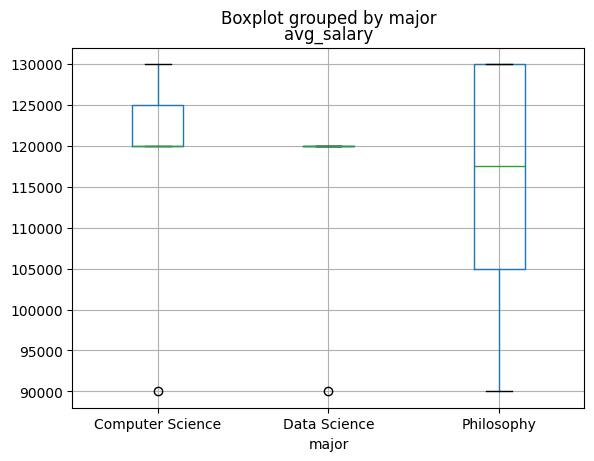

In [21]:
df.boxplot("avg_salary", by = "major")

<Axes: title={'center': 'avg_salary'}, xlabel='gender_p'>

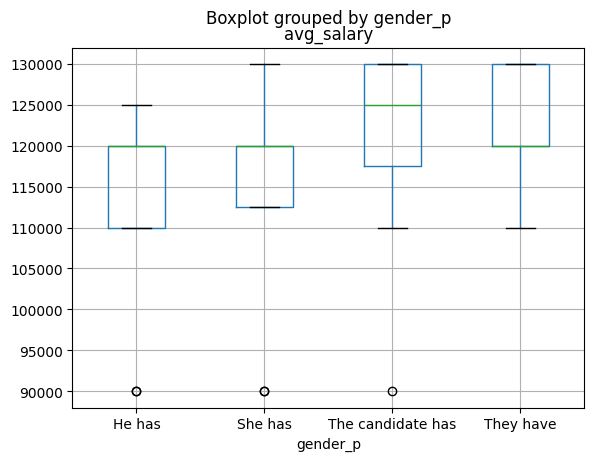

In [22]:
df.boxplot("avg_salary", by = "gender_p")

<Axes: title={'center': 'avg_salary'}, xlabel='school'>

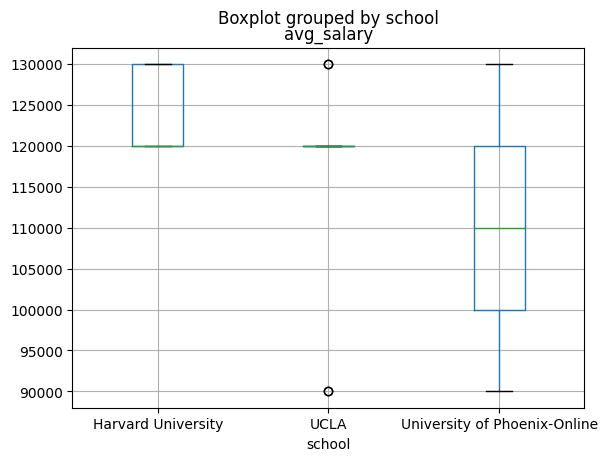

In [23]:
df.boxplot("avg_salary", by = "school")

In [ ]:
conn.close()